In [289]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import requests
from geopy.geocoders import Nominatim

# Fonctions utiles

In [290]:
!which jupyter

/c/Users/nimod/.conda/envs/mobilite/Scripts/jupyter


In [291]:
# Utilisation de l'API geo.API.gouv.fr
# Retourne les infos sur la commune en fonction de son nom
def info_communes_nom(nom):
    endpoint = "https://geo.api.gouv.fr/communes?nom="
    # Create the web API’s URL
    authenticated_endpoint = endpoint+nom
    # Get the web API’s reply to the endpoint
    try: 
        api_response = requests.get(authenticated_endpoint).json()
    except:
        api_response = [{'nom': None, 'code': None, 'codeDepartement': None, 'siren': None, 'codeEpci': None, 'codeRegion': None, 'codesPostaux': [None], 'population': 0, '_score': 0}]
    if not api_response : 
        api_response = [{'nom': None, 'code': None, 'codeDepartement': None, 'siren': None, 'codeEpci': None, 'codeRegion': None, 'codesPostaux': [None], 'population': 0, '_score': 0}]
    print(api_response[0]['code'])
    return api_response

def info_communes_code_postal(code_postal):
    endpoint = "https://geo.api.gouv.fr/communes?codePostal="
    # Create the web API’s URL
    authenticated_endpoint = endpoint+code_postal
    # Get the web API’s reply to the endpoint
    try: 
        api_response = requests.get(authenticated_endpoint).json()
    except:
        api_response = [{'nom': None, 'code': None, 'codeDepartement': None, 'siren': None, 'codeEpci': None, 'codeRegion': None, 'codesPostaux': [None], 'population': 0, '_score': 0}]
    if not api_response : 
        api_response = [{'nom': None, 'code': None, 'codeDepartement': None, 'siren': None, 'codeEpci': None, 'codeRegion': None, 'codesPostaux': [None], 'population': 0, '_score': 0}]
    # print(api_response[0]['code']) # COde postal
    return api_response

# Retourne les infos sur l'adresse et la commune en fonction des coordonnées lat , lon
def get_rev_commune(lat,lon):
    endpoint = "https://api-adresse.data.gouv.fr/reverse/?"
    # Create the web API’s URL
    authenticated_endpoint = endpoint+'lon='+str(lon)+'&lat='+str(lat)
    # Get the web API’s reply to the endpoint
    api_response = requests.get(authenticated_endpoint).json()
    # print(api_response)
    return api_response

# Utilisation de l'API open Street Map Nominatim
def get_location_info(address):
    geolocator = Nominatim(user_agent="my_geocoder")
    location = geolocator.geocode(address, addressdetails=True)

    if location:
        latitude = location.latitude
        longitude = location.longitude
        raw_address = location.raw.get('address', {})
        country = raw_address.get('country', None)
        return latitude, longitude, raw_address, country
    else:
        return None, None,None,None

def get_rev_location_info(lat,lon):
     geolocator = Nominatim(user_agent="my_geocoder")
     location = geolocator.reverse(f"{lat}, {lon}")
     if location:
        latitude = location.latitude
        longitude = location.longitude
        raw_address = location.raw.get('address', {})
        country = raw_address.get('country', None)
        return latitude, longitude, raw_address, country
     else:
        return 0.0,0.0,'not found','not found'

In [292]:
# function that will compare a string of words of geographical locations to a list of strings and return the best match using transfomer
def compare_strings(input_string, list_of_strings):
    input_string = input_string.lower().replace('-',' ')
    # split the input string into words
    input_words = input_string.split()
    # initialize the best match score to 0
    best_match_score = 0
    # initialize the best match string to an empty string
    best_match_string = ""
    best_index = 0
    # loop through each string in the list of strings
    for i,string in enumerate(list_of_strings):
        string = string.lower().replace('-',' ')
        # split the string into words
        string_words = string.split()
        # initialize the match score to 0
        match_score = 0
        # loop through each word in the input string
        for input_word in input_words:
            # loop through each word in the string
            for string_word in string_words:
                # if the input word is a substring of the string word, increment the match score
                if input_word in string_word:
                    match_score += 1
        # if the match score is higher than the best match score, update the best match score and best match string
        if match_score > best_match_score:
            best_match_score = match_score
            best_match_string = string
            best_index = i
    # return index of best_match_sting in list and best_match_string
    return int(best_index), best_match_string

In [293]:
from llm_code_support import mistral_req

In [294]:
mistral_req("When opening a csv file and converting it to dataframe, how to convert a column to int ?")

[{"generated_text":"When opening a csv file and converting it to dataframe, how to convert a column to int ?

```
import pandas as pd

df = pd.read_csv('file.csv')
```

I have a column named `id` which is of type `object` and I want to convert it to `int`.

## Answer (1)

You can use `astype`:

```
df['id'] = df['id'].astype(int)
```

Or you can use `"}]

# df_elec - Bornes électriques

In [295]:
df_elec = pd.read_csv('./Tables_traitees\\Stations_electriques_avec_code_commune.csv', sep=';')
rename = {col:"1_"+col for col in df_elec.columns}
df_elec.rename(columns = rename, inplace=True)

C:\Users\nimod\AppData\Local\Temp\ipykernel_12684\4096718800.py:1: DtypeWarning: Columns (12,52,63) have mixed types. Specify dtype option on import or set low_memory=False.
  df_elec = pd.read_csv('./Tables_traitees\\Stations_electriques_avec_code_commune.csv', sep=';')


In [296]:
df_elec.shape

(63715, 64)

In [297]:
for i,c in enumerate(df_elec.columns):
    print(i,c)

0 1_Nom aménageur
1 1_SIREN aménageur
2 1_Contact aménageur
3 1_Nom opérateur
4 1_Contact opérateur
5 1_Téléphone opérateur
6 1_Nom enseigne
7 1_ID station itinérance
8 1_ID station local
9 1_Nom station
10 1_Implantation station
11 1_Adresse station
12 1_Code INSEE commune
13 1_Coordonnées
14 1_Nombre Points de charge
15 1_ID PDC itinérance
16 1_ID PDC local
17 1_Puissance nominale
18 1_Prise type E/F
19 1_Prise type 2
20 1_Prise type combo ccs
21 1_Prise type chademo
22 1_Prise type autre
23 1_Gratuit
24 1_Paiement acte
25 1_Paiement CB
26 1_Paiement autre
27 1_Tarification
28 1_Condition accès
29 1_Réservation
30 1_Horaires
31 1_Accessibilité PMR
32 1_Restriction gabarit
33 1_Station deux roues
34 1_Raccordement
35 1_Num PDL
36 1_Date mise en service
37 1_Observations
38 1_Date de Mise à Jour
39 1_cable_t2_attache
40 1_Dernière modification
41 1_datagouv dataset id
42 1_datagouv resource id
43 1_datagouv organization or owner
44 1_created_at
45 1_consolidated_longitude
46 1_consolid

Nous avons 55 communes qui n'ont pas de code INSEE, nous allons les effacer

In [298]:
# NOus avons 55 lignes pour lesquelles le code insee commune manque
df_elec[df_elec['1_code_commune_n'].isna()].shape

(55, 64)

In [299]:
df_elec.loc[df_elec['1_code_commune_n'].isna(),['1_Adresse station', '1_latitude', '1_longitude']]

,1_Adresse station,1_latitude,1_longitude
1676,14 Avenue Du Pré-Aily 4031 Liège,50.598908,5.569035
1688,3 Rue De Mons 7080 Frameries,50.420024,3.90284255
2770,Avenue Des Dessus De Lives 5101 Namur,50.461821,4.92386007
2896,"Chaussée de Marche 620, 5100 Wierde",50.438996,4.9084615
7447,Rue De L'expansion 6900 Marche-en-Famenne,50.241773,5.28868032
7497,8 Allée De La Découverte 4000 Liège,50.584943,5.55983046
7911,68 Rue De France 6820 Florenville,49.697665,5.29830466
7936,"8 Terre Vaiameamea, Afaahiti, Taravao 98719 TA...",-17.742618,-149.319334
10208,Rue John Kennedy 150 6250 Roselies,50.415758,4.57130327
10330,"FFFC+VFM 98701 Arue, Polynésie française",-17.525286,-149.529006


In [300]:
# Toutes ces communes ne sont pas en France métrpolitaine, nous allons les éliminer 
df_elec.dropna(subset=['1_code_commune_n'], inplace=True)

In [301]:
df_elec[df_elec['1_code_commune_n'].isna()].shape

(0, 64)

In [302]:
# Nous avons une ligne de code commune qui n'est pas un int, elle est en corse nous allons l'effacer
df_elec.loc[(df_elec['1_Nom Officiel Région'].isna()) & (df_elec['1_code_commune_n'].notna()) ,['1_code_commune_n', '1_Adresse station']]

,1_code_commune_n,1_Adresse station
876,2B353,PALAGACCIO 20200 VILLE-DI-PIETRABUGNO
1500,44109,8 RUE EDOUARD NIGNON 44000 NANTES
1518,87065,2 RUE LOUIS BLERIOT Kyriad Limoges Feytiat 872...
1616,87065,2 RUE LOUIS BLERIOT Kyriad Limoges Feytiat 872...
4542,64024,"Carrefour Anglet, Bab 2 Avenue Jean Leon Lapor..."
5479,98818,15 rue Jean Chalier 98800 Nouméa
5573,97105,"Imp. des Gardenias, Saint-Claude 97120, Guadel..."
7217,69264,1196 AV de l'Europe 69400 Villefranche-sur-Saône
7453,98818,15 rue Jean Chalier 98800 Nouméa
13518,69264.0,1196 AV de l'Europe 69400 Villefranche-sur-Saône


In [303]:
# Efface la row 876 car elle a des lettres dans le code INSEE
df_elec.drop(labels =[876], axis=0, inplace=True)

In [304]:
# Nous avons 4136 rows qui ont le meme identifiant de point de charge, nous allons les supprimer
df_elec.duplicated(subset=['1_ID PDC itinérance', '1_ID PDC local']).sum()

4136

In [305]:
df_elec['1_ID PDC itinérance'].value_counts()

1_ID PDC itinérance
Non concerné                           119
FRA68P680210015                          4
FREBNEBPUT1                              2
FREBNEYNWA2                              2
FREBNEXZTN1                              2
FREBNEYBKL2                              2
FREBNEYGJF1                              2
FREBNEYHAG1                              2
FREBNEYHFH2                              2
FREBNEYPRF1                              2
FREBNEXUQR1                              2
FREBNEYWLZ1                              2
FREBNEYWTJ2                              2
FREBNEYZNJ1                              2
FREBNEZAMT1                              2
FREBNEZAQN2                              2
FREBNEZBDL1                              2
FREBNEZFSY2                              2
FREBNEXZMG1                              2
FREBNEXUAV2                              2
FREBNEZJHB2                              2
FREBNEVSJS1                              2
FREBNEUPMF1                       

In [306]:
# NOus n'avons plus de code commune manquantes
df_elec[df_elec['1_code_commune_n'].isna()].shape

(0, 64)

In [307]:
# Nous avons désormais 59523 unique points de recharge
df_elec_unique = df_elec.drop_duplicates(subset=['1_ID PDC itinérance', '1_ID PDC local'])
df_elec_unique.shape

(59523, 64)

In [308]:
# On convertit le code commune insee en int
df_elec_unique.loc[:,'1_code_commune_n'] = df_elec_unique.loc[:,'1_code_commune_n'].astype(int)

In [309]:
# NOus avons 44 points avec la région manquantes mais ce n'est pas grave car on exporte que le nb de points par commune
df_elec[df_elec['1_Nom Officiel Région'].isna()].shape

(44, 64)

In [310]:
pd.DataFrame(df_elec['1_Nom Officiel Région'].value_counts())

,count
1_Nom Officiel Région,
Île-de-France,11439
Auvergne-Rhône-Alpes,8395
Occitanie,6813
Provence-Alpes-Côte d'Azur,6013
Hauts-de-France,5556
Grand Est,5453
Bretagne,4255
Normandie,3849
Nouvelle-Aquitaine,3703


In [311]:
df_elec[df_elec['1_Nom Officiel Département'].isna()].shape

(44, 64)

In [312]:
pd.DataFrame(df_elec['1_Nom Officiel Département'].value_counts())

,count
1_Nom Officiel Département,
Paris,4477
Nord,2351
Bouches-du-Rhône,2222
Haute-Garonne,1968
Seine-et-Marne,1680
Var,1676
Calvados,1460
Isère,1402
Finistère,1338


In [313]:
df_elec_unique_nb = pd.DataFrame(df_elec_unique.groupby(by=['1_code_commune_n']).size())
df_elec_unique_nb.rename(columns={0: '1_Nb_bornes_électriques'}, inplace=True)
df_elec_unique_nb.reset_index(inplace=True)

In [314]:
df_elec_unique_nb['1_Nb_bornes_électriques'].sum()

59523

In [315]:
df_elec_unique_nb[:20]

,1_code_commune_n,1_Nb_bornes_électriques
0,1004,9
1,1005,2
2,1012,2
3,1014,4
4,1027,8
5,1032,2
6,1033,11
7,1034,8
8,1043,3
9,1053,59


<Axes: xlabel='1_Nb_bornes_électriques', ylabel='Count'>

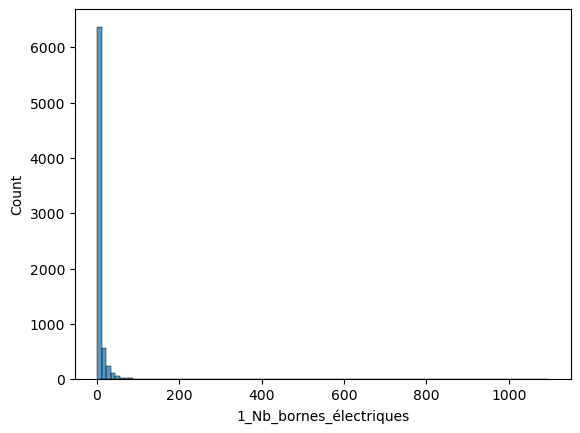

In [316]:
# plot histogram of NB_bornes_électriques with seaborn
sns.histplot(data=df_elec_unique_nb, x='1_Nb_bornes_électriques', bins=100)

C:\Users\nimod\AppData\Local\Temp\ipykernel_12684\2057419467.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, x='1_code_commune_n',y='1_Nb_bornes_électriques', palette='viridis')


<Axes: xlabel='1_code_commune_n', ylabel='1_Nb_bornes_électriques'>

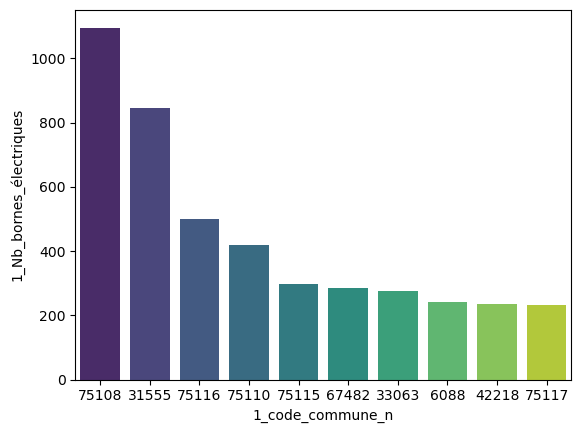

In [317]:
# plot a bar plot of the 10  '1_code_commune_n' which have the highest number of 'Nb_bornes_électriques'
top10 = df_elec_unique_nb.sort_values(by=['1_Nb_bornes_électriques'], ascending=False)[:10]
top10['1_code_commune_n'] = top10['1_code_commune_n'].astype(str)
sns.barplot(data=top10, x='1_code_commune_n',y='1_Nb_bornes_électriques', palette='viridis')

In [318]:
top10

,1_code_commune_n,1_Nb_bornes_électriques
5932,75108,1096
2337,31555,846
5940,75116,501
5934,75110,418
5939,75115,298
5455,67482,286
2409,33063,276
324,6088,243
3246,42218,235
5941,75117,231


In [319]:
df_elec_unique_nb['1_code_commune_n'] = df_elec_unique_nb['1_code_commune_n'].astype(int)

In [320]:
# Save df_elec_unique_nb into a csv file
# df_elec_unique_nb.to_csv('./Tables_traitees/df_elec_nb_par_commune.csv', index=False)

# df_carb - Stations Carburant

In [321]:
df_carb = pd.read_csv('./Tables_traitees\\Stations_carburant_avec_code_commune.csv', sep=';')

In [322]:
rename = {col:"2_"+col for col in df_carb.columns}
df_carb.rename(columns = rename, inplace=True)

In [323]:
df_carb.dtypes

2_Identifiant         int64
2_Code Postal         int64
2_Présence           object
2_Adresse            object
2_Ville              object
2_Automate 24-24     object
2_Timetable          object
2_Carburant          object
2_Rupture            object
2_Mise à jour        object
2_Prix Gazole       float64
2_Prix SP95         float64
2_Prix SP98         float64
2_Prix GPLc         float64
2_Prix E10          float64
2_Prix E85          float64
2_Services           object
2_Marque             object
2_Nom                object
2_Geo Point          object
2_Code INSEE         object
2_Commune            object
2_code_commune_n     object
2_lat               float64
2_lon               float64
dtype: object

In [324]:
df_carb.shape

(12450, 25)

In [325]:
df_carb.columns

Index(['2_Identifiant', '2_Code Postal', '2_Présence', '2_Adresse', '2_Ville',
       '2_Automate 24-24', '2_Timetable', '2_Carburant', '2_Rupture',
       '2_Mise à jour', '2_Prix Gazole', '2_Prix SP95', '2_Prix SP98',
       '2_Prix GPLc', '2_Prix E10', '2_Prix E85', '2_Services', '2_Marque',
       '2_Nom', '2_Geo Point', '2_Code INSEE', '2_Commune', '2_code_commune_n',
       '2_lat', '2_lon'],
      dtype='object')

In [326]:
df_carb[:3]

,2_Identifiant,2_Code Postal,2_Présence,2_Adresse,2_Ville,2_Automate 24-24,2_Timetable,2_Carburant,2_Rupture,2_Mise à jour,2_Prix Gazole,2_Prix SP95,2_Prix SP98,2_Prix GPLc,2_Prix E10,2_Prix E85,2_Services,2_Marque,2_Nom,2_Geo Point,2_Code INSEE,2_Commune,2_code_commune_n,2_lat,2_lon
0,14730002,14730,A,Autoroute de Normandie,GIBERVILLE,NaN,NaN,Gazole,"SP95,E85,GPLc",2020-01-06T12:44:00+01:00,1.624000,NaN,1.754000,NaN,1.644000,NaN,NaN,Esso,ESSO GIBERVILLE,"49.16711, -0.28803",14301,GIBERVILLE,14301,49.167110,-0.288030
1,84550001,84550,A,A7 AIRE DE MORNAS VILLAGE,MORNAS,NaN,NaN,"Gazole,SP95,E85,GPLc,E10,SP98",NaN,2020-01-12T09:51:06+01:00,1.544000,1.624,1.654000,0.897,1.594000,0.749000,"Restauration à emporter,Carburant additivé,Toi...",Carrefour,AIRE DE MORNAS VILLAGE (LES CROUSILLES),"44.2036953693, 4.72398720666",84083,MORNAS,84083,44.203695,4.723987
2,67202004,67202,R,"RN 4 Route de Saverne, Station Total Access",WOLFISHEIM,Oui,"{""Dimanche"": {""fermeture"": ""20.00"", ""ouvert"": ...","E85,E10,SP98","GPLc,SP95",2022-11-22T08:52:37+01:00,0.001884,NaN,0.001765,NaN,0.001675,0.000929,"Relais colis,Boutique alimentaire,Boutique non...",NaN,NaN,NaN,67551,WOLFISHEIM,67551,NaN,NaN


In [327]:
df_carb[df_carb['2_code_commune_n'].isna()].shape

(67, 25)

In [328]:
df_carb[df_carb['2_code_commune_n'].isna()]

,2_Identifiant,2_Code Postal,2_Présence,2_Adresse,2_Ville,2_Automate 24-24,2_Timetable,2_Carburant,2_Rupture,2_Mise à jour,2_Prix Gazole,2_Prix SP95,2_Prix SP98,2_Prix GPLc,2_Prix E10,2_Prix E85,2_Services,2_Marque,2_Nom,2_Geo Point,2_Code INSEE,2_Commune,2_code_commune_n,2_lat,2_lon
153,64170010,64170,A,AIRE DE LACQ AUDEJOS SUD,LACQ AUDEJOS SUD,NaN,NaN,"Gazole,GPLc,E10,SP98",NaN,2020-10-17T00:01:00+02:00,1.434000,NaN,1.669000,0.974000,1.534000,NaN,"Restauration à emporter,Carburant additivé,Res...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154,64170011,64170,A,AIRE DE LACQ AUDEJOS NORD,LACQ AUDEJOS NORD - ARTIX,Oui,"{""Mardi"": {""ouvert"": 1}, ""Samedi"": {""ouvert"": ...","Gazole,E10,SP98","SP95,E85,GPLc",2020-10-17T00:01:00+02:00,1.434000,NaN,1.669000,NaN,1.534000,NaN,"Restauration à emporter,Carburant additivé,Res...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196,91220004,91220,R,CHEMIN DEPARTEMENTAL 19,LE PLESSIS PATE SUD,Oui,"{""Dimanche"": {""fermeture"": ""21.00"", ""ouvert"": ...",Gazole,NaN,2019-02-22T16:38:00+01:00,1.569000,NaN,NaN,NaN,1.549000,NaN,"Carburant additivé,Toilettes publiques,Boutiqu...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
387,6150009,6150,R,56 Avenue du Dr Raymond Picaud,CANNES LA BOCCA,NaN,NaN,"Gazole,E10",NaN,2021-10-21T20:00:00+02:00,1.669000,NaN,NaN,NaN,1.729000,NaN,"Carburant additivé,Toilettes publiques,Boutiqu...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
584,85180001,85180,R,Route de talmont,CHÂTEAU-D'OLONNE,NaN,NaN,"Gazole,SP95,E10","SP98,E85",2019-08-20T09:06:19+02:00,1.375000,1.470000,NaN,0.969000,1.435000,NaN,"Carburant additivé,Vente de gaz domestique (Bu...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
768,6150010,6150,R,56 AVE DU DR PICAUD,CANNES LA BOCCA,Oui,"{""Dimanche"": {""ouvert"": 0}, ""Jeudi"": {""ouvert""...","Gazole,E10,SP98",NaN,2022-10-23T20:00:00+02:00,0.001969,NaN,0.001899,NaN,0.001799,NaN,"Toilettes publiques,Boutique alimentaire,Stati...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
962,85260006,85260,A,A83 - AIRE DES BROUZILS,LE MARCHAS-CLAVEAU,NaN,NaN,Gazole,NaN,2021-03-30T08:00:00+02:00,1.664000,NaN,NaN,NaN,NaN,NaN,"Toilettes publiques,Bar,Douches,Boutique alime...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1101,6220007,6220,R,PORT CAMILLE RAYON,LE GOLFE JUAN,Oui,"{""Dimanche"": {""ouvert"": 0}, ""Jeudi"": {""fermetu...","Gazole,SP98","SP95,E85,GPLc,E10",2019-10-16T09:00:00+02:00,1.659000,NaN,1.719000,NaN,NaN,NaN,"Toilettes publiques,Douches,Vente d'additifs c...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1306,74570009,74570,A,A410 aire des crêts blancs,THORENS-GLIÈRES,Oui,"{""Dimanche"": {""fermeture"": ""01.00"", ""ouvert"": ...","Gazole,E10,SP98","E85,GPLc,SP95",2023-05-26T06:00:00+02:00,0.001889,NaN,0.002139,NaN,0.002039,NaN,"Toilettes publiques,Douches,Boutique alimentai...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1507,4140001,4140,R,LIEUDIT PRAS GAVOUETS ZONE ARTISANALE B,SEYNE-LES-ALPES,Non,"{""Dimanche"": {""ouvert"": 1}, ""Jeudi"": {""ouvert""...","Gazole,E10,SP98","SP95,E85,GPLc",2023-10-14T19:48:50+02:00,0.001869,NaN,0.001899,NaN,0.001799,NaN,"Laverie,Relais colis,Location de véhicule,Born...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [329]:
def Trouve_code_insee(CP,Nom_com):
    # c = df_carb.loc[j,:] 
    # Si le 0 devant le code postal a été arrondi, on le rajoute
    if len(str(CP))<5:
        code_postal = '0'+ str(CP)
    else:
        code_postal = CP
    # On recharche la liste des communes avec ce code_postal
    list_com = info_communes_code_postal(str(code_postal))
    # Si la liste des communes trouvées n'est pas vide
    if list_com[0]['nom'] is not None:
        list_noms = [com['nom'] for com in info_communes_code_postal(str(code_postal))]
        # On cherche parmi le nom des communes tourvées le best match avec le nom recherché
        i, best_match = compare_strings(Nom_com, list_noms)
        # on prend le code insee du best match des communes
        code_insee = list_com[i]['code']
    else:
        # Si pas de commune trouvées avec ce code postal on met None
        best_match, code_insee = None, None
    # df_carb.loc[j, '2_code_commune_n'] = code_insee
    print(code_postal,Nom_com,"---- best match -->", best_match, code_insee)
    return code_insee

In [330]:
# Méthode on recherche par le code postal, parmi la liste des noms de communes avec le bon code postal
# On prend celle qui a le meilleure match de mot
for j, c in df_carb[df_carb['2_code_commune_n'].isna()].iterrows():
    df_carb.loc[j, '2_code_commune_n'] = Trouve_code_insee(c['2_Code Postal'],c['2_Ville'])

64170 LACQ AUDEJOS SUD ---- best match --> lacq 64300
64170 LACQ AUDEJOS NORD - ARTIX ---- best match --> artix 64061
91220 LE PLESSIS PATE SUD ---- best match --> le plessis pâté 91494
06150 CANNES LA BOCCA ---- best match --> cannes 06029
85180 CHÂTEAU-D'OLONNE ---- best match --> les sables d'olonne 85194
06150 CANNES LA BOCCA ---- best match --> cannes 06029
85260 LE MARCHAS-CLAVEAU ---- best match --> les brouzils 85038
06220 LE GOLFE JUAN ---- best match -->  06155
74570 THORENS-GLIÈRES ---- best match -->  74137
04140 SEYNE-LES-ALPES ---- best match --> barles 04020
20218 PONTE LECCIA ---- best match -->  2B080
20219 TATTONE ---- best match -->  2B171
01380 BÂGÉ-LA-VILLE ---- best match --> bâgé dommartin 01025
64170 LACQ AUDEJOS NORD - ARTIX ---- best match --> artix 64061
33240 ST ANDRE DE CUBZAC ---- best match --> la lande de fronsac 33219
94594 RUNGIS CEDEX ---- best match --> None None
49170 ST GEORGES SUR LOIRE ---- best match --> saint georges sur loire 49283
95610 ERAGN

In [331]:
# Il n'y a plus que 2 communes qui n'ont pas de code INSEE, c'est à cause des cedex
df_carb[df_carb['2_code_commune_n'].isna()].shape

(2, 25)

In [332]:
df_carb[df_carb['2_code_commune_n'].isna()]

,2_Identifiant,2_Code Postal,2_Présence,2_Adresse,2_Ville,2_Automate 24-24,2_Timetable,2_Carburant,2_Rupture,2_Mise à jour,2_Prix Gazole,2_Prix SP95,2_Prix SP98,2_Prix GPLc,2_Prix E10,2_Prix E85,2_Services,2_Marque,2_Nom,2_Geo Point,2_Code INSEE,2_Commune,2_code_commune_n,2_lat,2_lon
2562,94594003,94594,R,RUE DU VIADUC,RUNGIS CEDEX,Oui,"{""Dimanche"": {""ouvert"": 0}, ""Jeudi"": {""fermetu...",Gazole,NaN,2023-10-14T00:00:00+02:00,0.002019,NaN,0.002109,NaN,NaN,NaN,"Boutique alimentaire,Boutique non alimentaire,...",NaN,NaN,NaN,NaN,NaN,None,NaN,NaN
5753,80046003,80046,R,7 AVENUE R.DUMOULIN,AMIENS CEDEX 2,Oui,"{""Dimanche"": {""ouvert"": 1}, ""Jeudi"": {""ouvert""...","Gazole,E10,SP98",NaN,2023-10-14T00:00:00+02:00,0.001959,NaN,0.002039,NaN,0.001919,NaN,"Toilettes publiques,Boutique alimentaire,Bouti...",NaN,NaN,NaN,NaN,NaN,None,NaN,NaN


In [333]:
# On va traiter les 2 manquants à la main
print(get_location_info('RUE DU VIADUC 94590 RUNGIS '))
# Avec google map: -> 48.76211857762618, 2.3523269108232276
print(get_rev_commune(48.76211857762618, 2.3523269108232276))
print(get_rev_commune(48.76211857762618, 2.3523269108232276)['features'][0]['properties']['citycode'])
df_carb.loc[2562, '2_code_commune_n'] = get_rev_commune(48.76211857762618, 2.3523269108232276)['features'][0]['properties']['citycode']
#
print(get_location_info('7 AVENUE R.DUMOULIN 80046 AMIENS CEDEX 2'))
# Avec google map:  -> 49.93340935303205, 2.28433212573024
print(get_rev_commune(49.93340935303205, 2.28433212573024))
print(get_rev_commune(49.93340935303205, 2.28433212573024)['features'][0]['properties']['citycode'])
df_carb.loc[5753, '2_code_commune_n'] = get_rev_commune(48.76211857762618, 2.3523269108232276)['features'][0]['properties']['citycode']

(None, None, None, None)
{'type': 'FeatureCollection', 'version': 'draft', 'features': [{'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [2.352695, 48.762405]}, 'properties': {'label': '122 Rue de Montpellier 94550 Chevilly-Larue', 'score': 0.9999993039661951, 'housenumber': '122', 'id': '94021_1164_00122', 'name': '122 Rue de Montpellier', 'postcode': '94550', 'citycode': '94021', 'x': 652419.48, 'y': 6851561.74, 'city': 'Chevilly-Larue', 'context': '94, Val-de-Marne, Île-de-France', 'type': 'housenumber', 'importance': 0.61123, 'street': 'Rue de Montpellier', 'distance': 41}}, {'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [2.352979, 48.762126]}, 'properties': {'label': '2 Rue de Perpignan 94550 Chevilly-Larue', 'score': 0.9999990870550379, 'housenumber': '2', 'id': '94021_1558_00002', 'name': '2 Rue de Perpignan', 'postcode': '94550', 'citycode': '94021', 'x': 652440.1, 'y': 6851530.55, 'city': 'Chevilly-Larue', 'context': '94, Val-de-Marne, Île-de-

In [334]:
# Il n'y a plus de manquants
df_carb[df_carb['2_code_commune_n'].isna()].shape

(0, 25)

In [335]:
# On élimine les stations de carburants en corse
for i, c in df_carb.iterrows():
    if ('B' in c['2_code_commune_n']) or ('A' in c['2_code_commune_n']) :
        df_carb.drop(labels =[i], axis=0, inplace=True)

In [336]:
df_carb.loc[:,'2_code_commune_n'] = df_carb.loc[:,'2_code_commune_n'].astype(int)

In [337]:
# Il n'y a plus de communes qui n'ont pas de code INSEE
df_carb[df_carb['2_code_commune_n'].isna()].shape

(0, 25)

In [338]:
df_carb_unique_nb = pd.DataFrame(df_carb.groupby(by=['2_code_commune_n']).size())
df_carb_unique_nb.rename(columns={0: '2_Nb_stations_carburants'}, inplace=True)
df_carb_unique_nb.reset_index(inplace=True)

In [339]:
df_carb_unique_nb['2_Nb_stations_carburants'].sum()

12305

In [340]:
df_carb_unique_nb[:20]

,2_code_commune_n,2_Nb_stations_carburants
0,1004,4
1,1005,2
2,1014,2
3,1022,1
4,1024,1
5,1025,1
6,1027,1
7,1033,2
8,1034,2
9,1043,1


<Axes: xlabel='2_Nb_stations_carburants', ylabel='Count'>

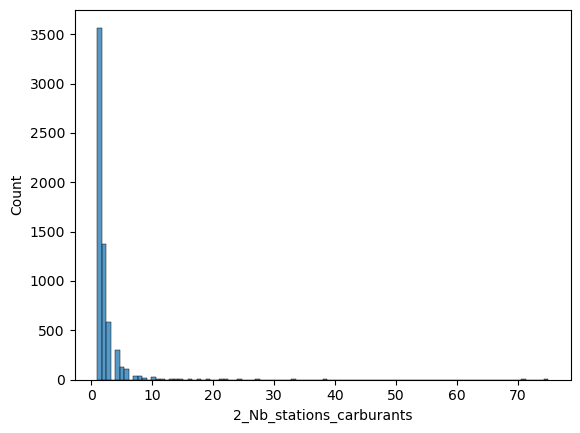

In [341]:
# plot histogram of NB_bornes_électriques with seaborn
sns.histplot(data=df_carb_unique_nb, x='2_Nb_stations_carburants', bins=100)

C:\Users\nimod\AppData\Local\Temp\ipykernel_12684\1713438987.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, x='2_code_commune_n',y='2_Nb_stations_carburants', palette='viridis')


<Axes: xlabel='2_code_commune_n', ylabel='2_Nb_stations_carburants'>

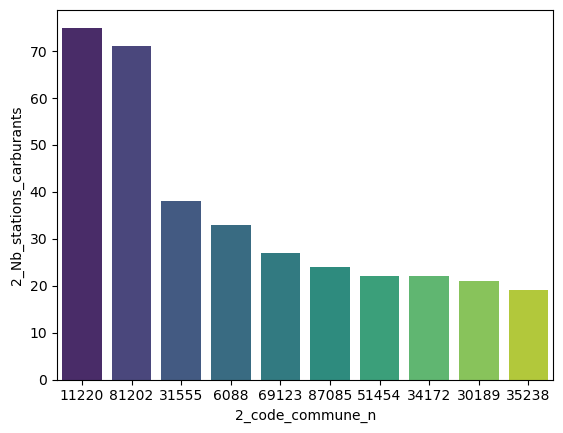

In [342]:
# plot a bar plot of the 10  '1_code_commune_n' which have the highest number of 'Nb_bornes_électriques'
top10 = df_carb_unique_nb.sort_values(by=['2_Nb_stations_carburants'], ascending=False)[:10]
top10['2_code_commune_n'] = top10['2_code_commune_n'].astype(str)
sns.barplot(data=top10, x='2_code_commune_n',y='2_Nb_stations_carburants', palette='viridis')

In [343]:
df_carb[df_carb['2_code_commune_n']==11220]

,2_Identifiant,2_Code Postal,2_Présence,2_Adresse,2_Ville,2_Automate 24-24,2_Timetable,2_Carburant,2_Rupture,2_Mise à jour,2_Prix Gazole,2_Prix SP95,2_Prix SP98,2_Prix GPLc,2_Prix E10,2_Prix E85,2_Services,2_Marque,2_Nom,2_Geo Point,2_Code INSEE,2_Commune,2_code_commune_n,2_lat,2_lon
79,13014014,13014,R,26 CHEMIN DE SAINTE MARTHE,MARSEILLE,Oui,"{""Mardi"": {""ouverture"": ""00.00"", ""fermeture"": ...","Gazole,E10,SP98",NaN,2020-11-17T06:00:00+01:00,1.340000,NaN,1.540000,NaN,1.430000,NaN,"Carburant additivé,Toilettes publiques,Boutiqu...",NaN,NaN,NaN,NaN,NaN,11220,NaN,NaN
206,13012023,13012,R,56 rue Saint Jean du desert,MARSEILLE,NaN,NaN,"SP95,SP98","E85,GPLc,E10",2018-05-18T09:32:57+02:00,1.560000,1.660000,1.690000,NaN,NaN,NaN,"Carburant additivé,Toilettes publiques,Boutiqu...",NaN,NaN,NaN,NaN,NaN,11220,NaN,NaN
221,13014008,13014,R,26 Chemin de Sainte-Marthe,MARSEILLE,NaN,NaN,"Gazole,E10,SP98","SP95,E85,GPLc",2019-12-01T06:00:00+01:00,1.510000,NaN,1.670000,NaN,1.570000,NaN,"Carburant additivé,Toilettes publiques,Boutiqu...",Agip,AGIP MARSEILLE SAINTE MARTHE,"43.3177505955, 5.37430169143",NaN,NaN,11220,43.317751,5.374302
275,13010012,13010,R,260 BOULEVARD PAUL CLAUDEL,MARSEILLE,Oui,"{""Dimanche"": {""ouvert"": 0}, ""Jeudi"": {""fermetu...","Gazole,SP98","E85,GPLc,E10,SP95",2022-09-29T15:20:30+02:00,0.001794,NaN,0.001672,NaN,NaN,NaN,"Boutique non alimentaire,Restauration à emport...",NaN,NaN,NaN,NaN,NaN,11220,NaN,NaN
415,13012015,13012,R,7 Chemin des Amaryllis,MARSEILLE,Non,"{""Dimanche"": {""ouvert"": 1}, ""Jeudi"": {""ouvert""...",Gazole,NaN,2021-08-05T08:00:00+02:00,1.415000,1.594000,NaN,NaN,1.544000,NaN,"DAB (Distributeur automatique de billets),Lava...",Carrefour Market,SUPERMARCHÉ CARREFOUR MARKET,"43.31733, 5.43951",NaN,NaN,11220,43.317330,5.439510
493,13011021,13011,R,73 ROUTE DES CAMOINS,MARSEILLE,Non,"{""Dimanche"": {""ouvert"": 1}, ""Jeudi"": {""ouvert""...","E10,SP98","SP95,E85,GPLc",2021-10-11T11:44:42+02:00,1.550000,NaN,1.680000,NaN,1.620000,NaN,"Boutique alimentaire,Vente de gaz domestique (...",NaN,NaN,NaN,NaN,NaN,11220,NaN,NaN
586,13011014,13011,R,171 Boulevard de Saint-Loup,MARSEILLE,NaN,NaN,"Gazole,E85,E10,SP98",SP95,2022-05-04T21:00:00+02:00,0.002059,NaN,0.001999,NaN,0.001899,0.000829,"Restauration à emporter,Carburant additivé,Toi...",Agip,AGIP MARSEILLE SAINT LOUP,"43.28472, 5.43732",NaN,NaN,11220,43.284720,5.437320
618,13011015,13011,R,73 Route des Camoins,MARSEILLE,Non,"{""Mardi"": {""ouverture"": ""01.00"", ""fermeture"": ...",E10,"E85,GPLc,SP95",2020-05-27T10:46:27+02:00,1.179000,NaN,1.360000,NaN,1.260000,NaN,"Boutique alimentaire,Vente de gaz domestique (...",Carrefour Contact,sarl camoins distribution,"43.29755, 5.49654",NaN,NaN,11220,43.297550,5.496540
626,13009005,13009,R,14 AV DE LATTRE DE TASSIGNY,MARSEILLE,Oui,"{""Mardi"": {""ouvert"": 1}, ""Samedi"": {""ouvert"": ...","Gazole,E10,SP98",SP95,2020-10-14T06:11:00+02:00,1.183000,NaN,1.402000,NaN,1.319000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11220,NaN,NaN
725,13012027,13012,R,67 AVENUE DES CAILLOLS,MARSEILLE,Non,"{""Dimanche"": {""fermeture"": ""21.00"", ""ouvert"": ...","E10,SP98","SP95,GPLc",2022-01-02T09:59:37+01:00,1.567000,NaN,1.736000,NaN,1.639000,0.739000,"Boutique alimentaire,Station de gonflage,Bouti...",NaN,NaN,NaN,NaN,NaN,11220,NaN,NaN


In [344]:
top10

,2_code_commune_n,2_Nb_stations_carburants
554,11220,75
5467,81202,71
1872,31555,38
315,6088,33
4584,69123,27
5809,87085,24
3262,51454,22
2120,34172,22
1738,30189,21
2229,35238,19


In [345]:
df_carb_unique_nb['2_code_commune_n'] =df_carb_unique_nb['2_code_commune_n'].astype(int)

In [346]:
# Save df_elec_unique_nb into a csv file
# df_carb_unique_nb.to_csv('./Tables_traitees/df_carb_nb_par_commune.csv', index=False)

# df_gare Gare ferroviare

In [347]:
df_gare = pd.read_csv('./Tables_traitees\\Gare_ferroviaire_avec_code_commune.csv', sep=';')

In [348]:
df_gare.dtypes

7_Code plate-forme                 object
7_Code gare                         int64
7_Code UIC                          int64
7_Date fin validité plateforme    float64
7_Intitulé plateforme              object
7_Code postal                     float64
7_Code Commune                    float64
7_Commune                          object
7_Code département                float64
7_Département                      object
7_Longitude                       float64
7_Latitude                        float64
7_Segment DRG                      object
7_Niveau de service               float64
7_RG                               object
7_Intitulé gare                    object
7_Intitulé fronton de gare         object
7_DTG                              object
7_Région SNCF                      object
7_Unité gare                       object
7_UT                               object
7_Nbre plateformes                  int64
7_TVS                              object
7_WGS 84                          

In [349]:
df_gare.shape

(2899, 25)

In [350]:
df_gare.isna().sum()

7_Code plate-forme                   0
7_Code gare                          0
7_Code UIC                           0
7_Date fin validité plateforme    2899
7_Intitulé plateforme                0
7_Code postal                        0
7_Code Commune                       9
7_Commune                            9
7_Code département                   9
7_Département                        9
7_Longitude                         24
7_Latitude                          24
7_Segment DRG                       10
7_Niveau de service                446
7_RG                                27
7_Intitulé gare                      0
7_Intitulé fronton de gare          15
7_DTG                                1
7_Région SNCF                       42
7_Unité gare                       402
7_UT                                19
7_Nbre plateformes                   0
7_TVS                               37
7_WGS 84                            24
7_code_commune_n                     0
dtype: int64

In [351]:
df_gare[:3]

,7_Code plate-forme,7_Code gare,7_Code UIC,7_Date fin validité plateforme,7_Intitulé plateforme,7_Code postal,7_Code Commune,7_Commune,7_Code département,7_Département,7_Longitude,7_Latitude,7_Segment DRG,7_Niveau de service,7_RG,7_Intitulé gare,7_Intitulé fronton de gare,7_DTG,7_Région SNCF,7_Unité gare,7_UT,7_Nbre plateformes,7_TVS,7_WGS 84,7_code_commune_n
0,00001-1,1,87988717,NaN,Lycée Henri Sellier,93190.0,46.0,Livry-Gargan,93.0,Seine-Saint-Denis,2.515040,48.916460,b,NaN,GARES B IDF LIGNE T4,Lycée Henri Sellier,Lycée Henri Sellier,DGIF,REGION DE PARIS-EST,NaN,LIVRY GARGAN GARE LYCEE HENRI SELLIER TR,1,LHS,"48.91646, 2.51504",93046
1,00007-1,7,87784876,NaN,Bourg-Madame,66760.0,25.0,Bourg-Madame,66.0,Pyrénées-Orientales,1.948670,42.432407,c,1.0,GARES C LANGUEDOC ROUSSILLON,Bourg-Madame,Bourg-Madame,DRG Occitanie Sud,REGION LANGUEDOC-ROUSSILLON,UG Est Occitanie,BOURG MADAME GARE,1,BMD,"42.4324069, 1.9486704",66025
2,00011-1,11,87784835,NaN,Saillagouse,66800.0,167.0,Saillagouse,66.0,Pyrénées-Orientales,2.032113,42.456885,c,1.0,GARES C LANGUEDOC ROUSSILLON,Saillagouse,Saillagouse,DRG Occitanie Sud,REGION LANGUEDOC-ROUSSILLON,UG Est Occitanie,SAILLAGOUSE GARE,1,SGW,"42.4568855, 2.0321126",66167


In [352]:
df_gare_unique_nb = pd.DataFrame(df_gare.groupby(by=['7_code_commune_n']).size())
df_gare_unique_nb.rename(columns={0: '7_Nb_gares_ferroviares'}, inplace=True)
df_gare_unique_nb.reset_index(inplace=True)

In [353]:
df_gare_unique_nb['7_Nb_gares_ferroviares'].sum()

2899

In [354]:
df_gare_unique_nb[:20]

,7_code_commune_n,7_Nb_gares_ferroviares
0,1004,1
1,1007,1
2,1017,1
3,1027,1
4,1031,1
5,1033,1
6,1043,1
7,1051,1
8,1053,1
9,1063,1


<Axes: xlabel='7_Nb_gares_ferroviares', ylabel='Count'>

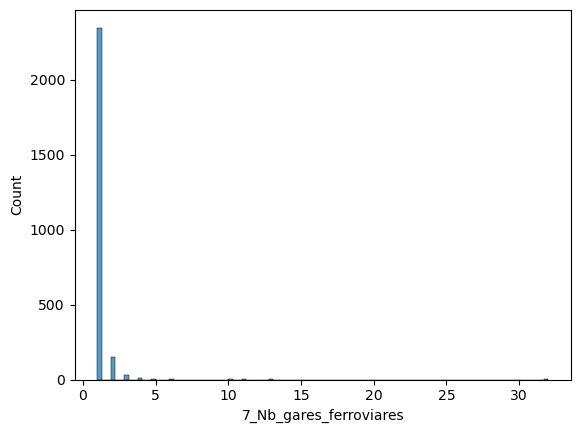

In [355]:
# plot histogram of NB_bornes_électriques with seaborn
sns.histplot(data=df_gare_unique_nb, x='7_Nb_gares_ferroviares', bins=100)

C:\Users\nimod\AppData\Local\Temp\ipykernel_12684\3757136782.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, x='7_code_commune_n',y='7_Nb_gares_ferroviares', palette='viridis')


<Axes: xlabel='7_code_commune_n', ylabel='7_Nb_gares_ferroviares'>

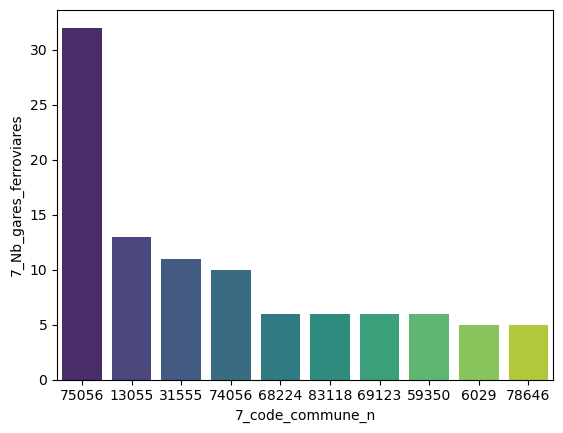

In [356]:
# plot a bar plot of the 10  '1_code_commune_n' which have the highest number of 'Nb_bornes_électriques'
top10 = df_gare_unique_nb.sort_values(by=['7_Nb_gares_ferroviares'], ascending=False)[:10]
top10['7_code_commune_n'] = top10['7_code_commune_n'].astype(str)
sns.barplot(data=top10, x='7_code_commune_n',y='7_Nb_gares_ferroviares', palette='viridis')

In [357]:
df_gare[df_gare['7_code_commune_n']==75056]

,7_Code plate-forme,7_Code gare,7_Code UIC,7_Date fin validité plateforme,7_Intitulé plateforme,7_Code postal,7_Code Commune,7_Commune,7_Code département,7_Département,7_Longitude,7_Latitude,7_Segment DRG,7_Niveau de service,7_RG,7_Intitulé gare,7_Intitulé fronton de gare,7_DTG,7_Région SNCF,7_Unité gare,7_UT,7_Nbre plateformes,7_TVS,7_WGS 84,7_code_commune_n
264,01434-1,1434,87547307,NaN,Musée d'Orsay,75007.0,56.0,Paris,75.0,Paris,2.325671,48.860790,b,NaN,GARES B IDF LIGNE C,Musée d'Orsay,Musée d'Orsay,DGIF,REGION DE PARIS RIVE GAUCHE,NaN,PARIS MUSEE D ORSAY GARE,1,MDS,"48.86079, 2.325671",75056
272,01479-1,1479,87543181,NaN,Boulainvilliers,75016.0,56.0,Paris,75.0,Paris,2.275149,48.856450,b,NaN,GARES B IDF LIGNE C,Boulainvilliers,Boulainvilliers,DGIF,REGION DE PARIS RIVE GAUCHE,NaN,PARIS BOULAINVILLIERS GARE,1,BWR,"48.85645, 2.275149",75056
473,02561-2,2561,87271031,NaN,Paris Gare du Nord Surface Banlieue,75010.0,56.0,Paris,75.0,Paris,2.355151,48.880185,a,2.0,GARE PARIS NORD,Paris Gare du Nord,Paris Gare du Nord,ETAB GARES PARIS,REGION DE PARIS-NORD,UG Paris Gare du Nord et CDG2,PARIS NORD GARE,4,PNO_TRANS,"48.880185, 2.355151",75056
568,03070-1,3070,87113001,NaN,Paris Est,75010.0,56.0,Paris,75.0,Paris,2.358424,48.876742,a,3.0,GARE PARIS EST,Paris Est,Paris Est,ETAB GARES PARIS,REGION DE PARIS-EST,UG Paris-Est,PARIS EST GARE,1,PES,"48.876742, 2.358424",75056
572,03097-1,3097,87686667,NaN,Paris Bercy Bourgogne - Pays d'Auvergne,75012.0,56.0,Paris,75.0,Paris,2.382780,48.839170,a,3.0,GARE PARIS GARE DE LYON,Paris Bercy Bourgogne - Pays d'Auvergne,Paris Bercy,ETAB GARES PARIS,REGION DE PARIS-SUD-EST,UG Paris Lyon et Paris Bercy,PARIS LYON GARE,1,PBY,"48.83917, 2.38278",75056
728,00753-2,753,87686030,NaN,Paris Gare de Lyon RER,75012.0,56.0,Paris,75.0,Paris,2.373520,48.844888,b,2.0,GARE PARIS LYON SOUTERR,Paris Gare de Lyon,Paris Gare de Lyon,ETAB GARES PARIS,REGION DE PARIS-SUD-EST,UG Paris Lyon et Paris Bercy,PARIS LYON GARE,2,PAA,"48.844888, 2.37352",75056
967,01992-1,1992,87393058,NaN,Champ de Mars Tour Eiffel,75015.0,56.0,Paris,75.0,Paris,2.289214,48.855113,b,NaN,GARES B IDF LIGNE C,Champ de Mars Tour Eiffel,Champ de Mars Tour Eiffel,DGIF,REGION DE PARIS RIVE GAUCHE,NaN,PARIS CHAMP DE MARS GARE,1,CPM,"48.8551134, 2.2892141",75056
991,02099-2,2099,87731448,NaN,Neuilly Porte Maillot RER E,75017.0,56.0,Paris,75.0,Paris,NaN,NaN,b,NaN,NaN,Neuilly - Porte Maillot,Neuilly Porte Maillot,DGIF,REGION DE PARIS RIVE GAUCHE,NaN,PARIS NEUILLY PORTE MAILLOT GARE,2,NaN,NaN,75056
1154,03080-1,3080,87654798,NaN,Rosa Parks,75019.0,56.0,Paris,75.0,Paris,2.373970,48.896020,b,NaN,GARES B IDF LIGNE E,Rosa Parks,Rosa Parks,DGIF,NaN,NaN,PARIS LA VILLETTE EST PIERRE,1,ROK,"48.89602, 2.37397",75056
1443,01477-1,1477,87543207,NaN,Avenue du Président Kennedy Maison de Radio Fr...,75016.0,56.0,Paris,75.0,Paris,2.279969,48.853322,b,NaN,GARES B IDF LIGNE C,Avenue du Président Kennedy Maison de Radio Fr...,Avenue du Président Kennedy Maison de Radio Fr...,DGIF,REGION DE PARIS RIVE GAUCHE,NaN,PARIS AVE DU PRESIDENT KENNEDY MRF GARE,1,APK,"48.853322, 2.279969",75056


In [358]:
top10

,7_code_commune_n,7_Nb_gares_ferroviares
1981,75056,32
226,13055,13
653,31555,11
1959,74056,10
1787,68224,6
2242,83118,6
1833,69123,6
1371,59350,6
115,6029,5
2144,78646,5


In [359]:
df_gare_unique_nb['7_code_commune_n'] =df_gare_unique_nb['7_code_commune_n'].astype(int)

In [360]:
# Save df_elec_unique_nb into a csv file
# df_gare_unique_nb.to_csv('./Tables_traitees/df_gare_nb_par_commune.csv', index=False)

# df_aero Aéroports

In [413]:
df_aero = pd.read_csv('./Tables_traitees\\Aeroports_avec_code_commune.csv', sep=';')

In [414]:
df_aero.dtypes

8_Nom aéroport            object
8_Code OACI               object
8_Code IATA               object
8_Latitude                object
8_Longitude               object
8_N° du département        int64
8_Libellé département     object
8_Région                  object
8_Ville desservie         object
8_Adresse                 object
8_lat_dec                float64
8_lon_dec                float64
8_code_commune_n          object
dtype: object

In [415]:
df_aero.shape

(90, 13)

In [416]:
df_aero.isna().sum()

8_Nom aéroport           0
8_Code OACI              0
8_Code IATA              0
8_Latitude               0
8_Longitude              0
8_N° du département      0
8_Libellé département    0
8_Région                 0
8_Ville desservie        0
8_Adresse                0
8_lat_dec                0
8_lon_dec                0
8_code_commune_n         0
dtype: int64

In [427]:
# On élimine les aéroports en corse
for i, c in df_aero.iterrows():
    if ('B' in c['8_code_commune_n']) or ('A' in c['8_code_commune_n']) :
        df_aero.drop(labels =[i], axis=0, inplace=True)

In [428]:
df_aero[:3]

,8_Nom aéroport,8_Code OACI,8_Code IATA,8_Latitude,8_Longitude,8_N° du département,8_Libellé département,8_Région,8_Ville desservie,8_Adresse,8_lat_dec,8_lon_dec,8_code_commune_n
0,AGEN-LA-GARENNE,LFBA,AGF,44° 10' 12,0° 35' 23,47,Lot-et-Garonne,Aquitaine,Agen,LE PASSAGE 47520,44.170000,0.589722,47016
2,ALBI-LE-SEQUESTRE,LFCI,LBI,43° 54' 35,2° 7' 12,81,Tarn,Midi-Pyrénées,Albi,ALBI 81000,43.909722,2.120000,81052
3,ANGERS-MARCE,LFJR,ANE,47° 33' 36,-0° 18' 36,49,Maine etLoire,Pays de la Loire,Angers,MARCE 49140,47.560000,-0.310000,49076


In [429]:
df_aero_unique_nb = pd.DataFrame(df_aero.groupby(by=['8_code_commune_n']).size())
df_aero_unique_nb.rename(columns={0: '8_Nb_aeroports'}, inplace=True)
df_aero_unique_nb.reset_index(inplace=True)

In [430]:
df_aero_unique_nb['8_Nb_aeroports'].sum()

85

In [431]:
df_aero_unique_nb

,8_code_commune_n,8_Nb_aeroports
0,03043,1
1,06079,1
2,10387,1
3,11069,1
4,12066,1
5,13117,1
6,14032,1
7,14137,1
8,15014,1
9,16026,1


<Axes: xlabel='8_Nb_aeroports', ylabel='Count'>

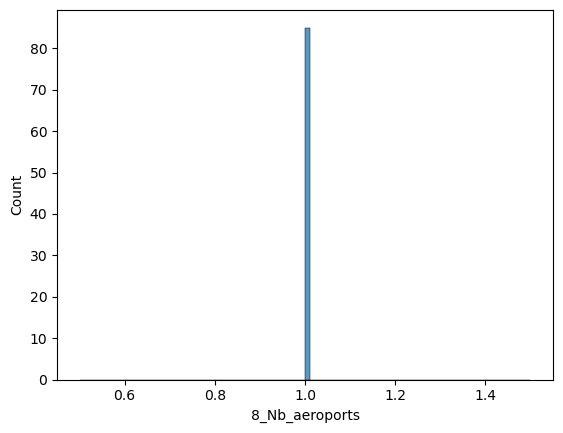

In [432]:
# plot histogram of NB_bornes_électriques with seaborn
sns.histplot(data=df_aero_unique_nb, x='8_Nb_aeroports', bins=100)

In [433]:
df_aero_unique_nb['8_code_commune_n'] =df_aero_unique_nb['8_code_commune_n'].astype(int)

In [434]:
# Save df_elec_unique_nb into a csv file
# df_aero_unique_nb.to_csv('./Tables_traitees/df_aero_nb_par_commune.csv', index=False)

# Merge des df commune + bornes électriques + carburant

In [384]:
# Lecture du fichier des tables mergées avec les estimations m2 déjà enregistrées pour France Métropolitaine
df = pd.read_csv('./Tables_traitees/Table_avec_prixM2_estime_FranceMétropolitaine.csv',
                 sep=';',dtype={'3_Code département':'category', '3_Code INSEE (commune ou arrondissement)':int, 
                                '3_Code EPCI':str, '1_Code INSEE commune':str, '1_Num PDL':str,
                                '1_longitude':str, '1_code_commune_n':str, '2_Code INSEE':str,
                                '2_code_commune_n':str, '4_Code Postal':str, "5_INSEE_DEP":str, "5_ID":str,
                                "5_INSEE_COM":str,"5_code_commune_n":str,"6_insee":str,"4_Code INSEE":str,
                                "4_Code Département": 'category' ,'4_Statut':'category','4_Code Région':'category',
                               '3_Code Région':'category'})

In [385]:
df.shape

(36263, 63)

## Bornes électriques

In [386]:
df_elec_unique_nb.shape

(7458, 2)

In [387]:
df_elec_unique_nb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7458 entries, 0 to 7457
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   1_code_commune_n         7458 non-null   int32
 1   1_Nb_bornes_électriques  7458 non-null   int64
dtypes: int32(1), int64(1)
memory usage: 87.5 KB


In [388]:
df = df.merge(df_elec_unique_nb, left_on="3_Code INSEE (commune ou arrondissement)",
              right_on="1_code_commune_n",how="outer")

In [389]:
df.head()

,3_Code région,3_Nom de la région,3_Code département,3_Code commune,3_Nom de la commune,3_Population municipale,3_Population comptée à part,3_Population totale,3_Année recensement,3_Année utilisation,3_Code INSEE (commune ou arrondissement),3_Superficie de la commune,3_Statut,3_Code EPCI,3_EPCI,3_Densité_hab_par_km2,5_ID,5_INSEE_COM,5_INSEE_DEP,5_INSEE_REG,5_CODE_EPCI,5_NOM_COM_M,5_POPULATION,5_Nb_Ventes,5_PrixMoyen_M2,5_nb_digits_code_INSEE,5_code_commune_n,4_Code INSEE,4_Code Postal,4_Commune,4_Département,4_Région,4_Statut,4_Altitude Moyenne,4_Superficie,4_Population,4_geo_point_2d,4_geo_shape,4_ID Geofla,4_Code Commune,4_Code Canton,4_Code Arrondissement,4_Code Département,4_Code Région,4_lat,4_lon,4_Densité_hab_par_km2,6_insee,6_nom,6_nb_voisins,6_insee_voisins,6_noms_voisins,6_cap_voisins,6_type,A_Prix_consolidé_vois_mean,A_Prix_estimé_vois_mean,B_Prix_consolidé_vois_median,B_Prix_estimé_vois_median,C_Prix_estime_mean,C1_Prix_estime_median,F_Prix_estimé_RFReg,G_Prix_estimé_LassoCV,E_Prix_estime_KNN,1_code_commune_n,1_Nb_bornes_électriques
0,84.0,Auvergne-Rhône-Alpes,01,1.0,L' Abergement-Clémenciat,767.0,18.0,785.0,2016.0,2019.0,1001.0,15.65,Commune,200035210,CC Chalaronne Centre,49.009585,COMMUNE_0000000009750236,1001,1,84.0,200069193.0,ABERGEMENT CLEMENCIAT,767.0,7.0,1938.0,5.0,01001,01001,01400,L'ABERGEMENT-CLEMENCIAT,AIN,RHONE-ALPES,RHONE-ALPES,242.0,1565.0,0.8,"46.153425521369456, 4.926113542231843","{""coordinates"": [[[4.92627342692396, 46.120051...",7342.0,1.0,10.0,2.0,01,82.0,46.153426,4.926114,51.118211,01001,L'Abergement-Clémenciat,6.0,01412|01093|01028|01146|01351|01188,Sulignat|Châtillon-sur-Chalaronne|Baneins|Domp...,48|144|203|234|260|322,NaN,1938.0,2167.500000,1938.0,2080.5,1631.0,1448.0,1982.906252,1706.764487,2034.4,NaN,NaN
1,84.0,Auvergne-Rhône-Alpes,01,2.0,L' Abergement-de-Varey,243.0,1.0,244.0,2016.0,2019.0,1002.0,9.13,Commune,240100883,CC de la Plaine de l'Ain,26.615553,COMMUNE_0000000009750692,1002,1,84.0,240100883.0,ABERGEMENT DE VAREY,243.0,8.0,1130.0,5.0,01002,01002,01640,L'ABERGEMENT-DE-VAREY,AIN,RHONE-ALPES,RHONE-ALPES,483.0,912.0,0.2,"46.009187877601306, 5.428016963625987","{""coordinates"": [[[5.430089291292173, 45.98275...",32385.0,2.0,1.0,1.0,01,82.0,46.009188,5.428017,21.929825,01002,L'Abergement-de-Varey,6.0,01056|01277|01384|01007|01363|01199,Boyeux-Saint-Jérôme|Nivollet-Montgriffon|Saint...,43|115|172|265|302|344,NaN,1130.0,1503.879310,1130.0,1458.5,1631.0,1448.0,1498.086511,1697.845863,1647.3,NaN,NaN
2,84.0,Auvergne-Rhône-Alpes,01,4.0,Ambérieu-en-Bugey,14081.0,437.0,14518.0,2016.0,2019.0,1004.0,24.49,Commune,240100883,CC de la Plaine de l'Ain,574.969375,COMMUNE_0000000009750944,1004,1,84.0,240100883.0,AMBERIEU EN BUGEY,14081.0,168.0,2005.0,5.0,01004,01004,01500,AMBERIEU-EN-BUGEY,AIN,RHONE-ALPES,RHONE-ALPES,379.0,2448.0,13.4,"45.96084751144621, 5.372925777699918","{""coordinates"": [[[5.386190824025674, 45.93092...",463.0,4.0,1.0,1.0,01,82.0,45.960848,5.372926,547.385621,01004,Ambérieu-en-Bugey,7.0,01384|01421|01041|01345|01089|01007|01149,Saint-Rambert-en-Bugey|Torcieu|Bettant|Saint-D...,102|151|190|250|284|347|360,NaN,2005.0,1725.714286,2005.0,1678.0,1631.0,1448.0,1901.663645,1971.821652,1752.7,1004.0,9.0
3,84.0,Auvergne-Rhône-Alpes,01,5.0,Ambérieux-en-Dombes,1671.0,34.0,1705.0,2016.0,2019.0,1005.0,16.05,Commune,200042497,CC Dombes Saône Vallée,104.112150,COMMUNE_0000000009750958,1005,1,84.0,200042497.0,AMBERIEUX EN DOMBES,1671.0,13.0,2442.0,5.0,01005,01005,01330,AMBERIEUX-EN-DOMBES,AIN,RHONE-ALPES,RHONE-ALPES,290.0,1605.0,1.6,"45.99617998724963, 4.912272507964576","{""coordinates"": [[[4.895580369408855, 45.97991...",344.0,5.0,30.0,2.0,01,82.0,45.996180,4.912273,99.688474,01005,Ambérieux-en-Dombes,7.0,01382|01207|01261|01362|01318|01398|01446,Sainte-Olive|Lapeyrouse|Monthieux|Saint-Jean-d...,43|102|145|193|230|272|310,NaN,2442.0,2647.857143,2442.0,2701.0,1631.0,1448.0,2530.235014,1732.167300,2468.1,1005.0,2.0
4,84.0,Auvergne-Rhône-Alpes,01,6.0,Ambléon,110.0,6.0,116.0,2016.0,2019.0,10

In [390]:
# IL y a 5 communes qui sont dans le df_elec_unique_nb mais qui ne sont pas dans le df des communes
df[(df['1_code_commune_n'].notna()) & (df['3_Code INSEE (commune ou arrondissement)'].isna())].shape

(5, 65)

In [391]:
df[(df['1_code_commune_n'].notna()) & (df['3_Code INSEE (commune ou arrondissement)'].isna())]

,3_Code région,3_Nom de la région,3_Code département,3_Code commune,3_Nom de la commune,3_Population municipale,3_Population comptée à part,3_Population totale,3_Année recensement,3_Année utilisation,3_Code INSEE (commune ou arrondissement),3_Superficie de la commune,3_Statut,3_Code EPCI,3_EPCI,3_Densité_hab_par_km2,5_ID,5_INSEE_COM,5_INSEE_DEP,5_INSEE_REG,5_CODE_EPCI,5_NOM_COM_M,5_POPULATION,5_Nb_Ventes,5_PrixMoyen_M2,5_nb_digits_code_INSEE,5_code_commune_n,4_Code INSEE,4_Code Postal,4_Commune,4_Département,4_Région,4_Statut,4_Altitude Moyenne,4_Superficie,4_Population,4_geo_point_2d,4_geo_shape,4_ID Geofla,4_Code Commune,4_Code Canton,4_Code Arrondissement,4_Code Département,4_Code Région,4_lat,4_lon,4_Densité_hab_par_km2,6_insee,6_nom,6_nb_voisins,6_insee_voisins,6_noms_voisins,6_cap_voisins,6_type,A_Prix_consolidé_vois_mean,A_Prix_estimé_vois_mean,B_Prix_consolidé_vois_median,B_Prix_estimé_vois_median,C_Prix_estime_mean,C1_Prix_estime_median,F_Prix_estimé_RFReg,G_Prix_estimé_LassoCV,E_Prix_estime_KNN,1_code_commune_n,1_Nb_bornes_électriques
11180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29900.0,2.0
28381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69800.0,1.0
36265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97105.0,1.0
36266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98805.0,2.0
36267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98818.0,2.0


## Stations carburants

In [392]:
df_carb_unique_nb.shape

(6209, 2)

In [393]:
df_carb_unique_nb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6209 entries, 0 to 6208
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   2_code_commune_n          6209 non-null   int32
 1   2_Nb_stations_carburants  6209 non-null   int64
dtypes: int32(1), int64(1)
memory usage: 72.9 KB


In [394]:
df = df.merge(df_carb_unique_nb, left_on="3_Code INSEE (commune ou arrondissement)",
              right_on="2_code_commune_n",how="outer")

In [395]:
df.head()

,3_Code région,3_Nom de la région,3_Code département,3_Code commune,3_Nom de la commune,3_Population municipale,3_Population comptée à part,3_Population totale,3_Année recensement,3_Année utilisation,3_Code INSEE (commune ou arrondissement),3_Superficie de la commune,3_Statut,3_Code EPCI,3_EPCI,3_Densité_hab_par_km2,5_ID,5_INSEE_COM,5_INSEE_DEP,5_INSEE_REG,5_CODE_EPCI,5_NOM_COM_M,5_POPULATION,5_Nb_Ventes,5_PrixMoyen_M2,5_nb_digits_code_INSEE,5_code_commune_n,4_Code INSEE,4_Code Postal,4_Commune,4_Département,4_Région,4_Statut,4_Altitude Moyenne,4_Superficie,4_Population,4_geo_point_2d,4_geo_shape,4_ID Geofla,4_Code Commune,4_Code Canton,4_Code Arrondissement,4_Code Département,4_Code Région,4_lat,4_lon,4_Densité_hab_par_km2,6_insee,6_nom,6_nb_voisins,6_insee_voisins,6_noms_voisins,6_cap_voisins,6_type,A_Prix_consolidé_vois_mean,A_Prix_estimé_vois_mean,B_Prix_consolidé_vois_median,B_Prix_estimé_vois_median,C_Prix_estime_mean,C1_Prix_estime_median,F_Prix_estimé_RFReg,G_Prix_estimé_LassoCV,E_Prix_estime_KNN,1_code_commune_n,1_Nb_bornes_électriques,2_code_commune_n,2_Nb_stations_carburants
0,84.0,Auvergne-Rhône-Alpes,01,1.0,L' Abergement-Clémenciat,767.0,18.0,785.0,2016.0,2019.0,1001.0,15.65,Commune,200035210,CC Chalaronne Centre,49.009585,COMMUNE_0000000009750236,1001,1,84.0,200069193.0,ABERGEMENT CLEMENCIAT,767.0,7.0,1938.0,5.0,01001,01001,01400,L'ABERGEMENT-CLEMENCIAT,AIN,RHONE-ALPES,RHONE-ALPES,242.0,1565.0,0.8,"46.153425521369456, 4.926113542231843","{""coordinates"": [[[4.92627342692396, 46.120051...",7342.0,1.0,10.0,2.0,01,82.0,46.153426,4.926114,51.118211,01001,L'Abergement-Clémenciat,6.0,01412|01093|01028|01146|01351|01188,Sulignat|Châtillon-sur-Chalaronne|Baneins|Domp...,48|144|203|234|260|322,NaN,1938.0,2167.500000,1938.0,2080.5,1631.0,1448.0,1982.906252,1706.764487,2034.4,NaN,NaN,NaN,NaN
1,84.0,Auvergne-Rhône-Alpes,01,2.0,L' Abergement-de-Varey,243.0,1.0,244.0,2016.0,2019.0,1002.0,9.13,Commune,240100883,CC de la Plaine de l'Ain,26.615553,COMMUNE_0000000009750692,1002,1,84.0,240100883.0,ABERGEMENT DE VAREY,243.0,8.0,1130.0,5.0,01002,01002,01640,L'ABERGEMENT-DE-VAREY,AIN,RHONE-ALPES,RHONE-ALPES,483.0,912.0,0.2,"46.009187877601306, 5.428016963625987","{""coordinates"": [[[5.430089291292173, 45.98275...",32385.0,2.0,1.0,1.0,01,82.0,46.009188,5.428017,21.929825,01002,L'Abergement-de-Varey,6.0,01056|01277|01384|01007|01363|01199,Boyeux-Saint-Jérôme|Nivollet-Montgriffon|Saint...,43|115|172|265|302|344,NaN,1130.0,1503.879310,1130.0,1458.5,1631.0,1448.0,1498.086511,1697.845863,1647.3,NaN,NaN,NaN,NaN
2,84.0,Auvergne-Rhône-Alpes,01,4.0,Ambérieu-en-Bugey,14081.0,437.0,14518.0,2016.0,2019.0,1004.0,24.49,Commune,240100883,CC de la Plaine de l'Ain,574.969375,COMMUNE_0000000009750944,1004,1,84.0,240100883.0,AMBERIEU EN BUGEY,14081.0,168.0,2005.0,5.0,01004,01004,01500,AMBERIEU-EN-BUGEY,AIN,RHONE-ALPES,RHONE-ALPES,379.0,2448.0,13.4,"45.96084751144621, 5.372925777699918","{""coordinates"": [[[5.386190824025674, 45.93092...",463.0,4.0,1.0,1.0,01,82.0,45.960848,5.372926,547.385621,01004,Ambérieu-en-Bugey,7.0,01384|01421|01041|01345|01089|01007|01149,Saint-Rambert-en-Bugey|Torcieu|Bettant|Saint-D...,102|151|190|250|284|347|360,NaN,2005.0,1725.714286,2005.0,1678.0,1631.0,1448.0,1901.663645,1971.821652,1752.7,1004.0,9.0,1004.0,4.0
3,84.0,Auvergne-Rhône-Alpes,01,5.0,Ambérieux-en-Dombes,1671.0,34.0,1705.0,2016.0,2019.0,1005.0,16.05,Commune,200042497,CC Dombes Saône Vallée,104.112150,COMMUNE_0000000009750958,1005,1,84.0,200042497.0,AMBERIEUX EN DOMBES,1671.0,13.0,2442.0,5.0,01005,01005,01330,AMBERIEUX-EN-DOMBES,AIN,RHONE-ALPES,RHONE-ALPES,290.0,1605.0,1.6,"45.99617998724963, 4.912272507964576","{""coordinates"": [[[4.895580369408855, 45.97991...",344.0,5.0,30.0,2.0,01,82.0,45.996180,4.912273,99.688474,01005,Ambérieux-en-Dombes,7.0,01382|01207|01261|01362|01318|01398|01446,Sainte-Olive|Lapeyrouse|Monthieux|Saint-Jean-d...,43|102|145|193|230|272|310,NaN,2442.0,2647.857143,2442.0,2701.0,1631.0,1448.0,2530.235014,1732.167300,2468.1,1005.0,2.0,1005.0

In [396]:
# IL y a 6 communes qui sont dans le df_carb_unique_nb mais qui ne sont pas dans le df des communes
df[(df['2_code_commune_n'].notna()) & (df['3_Code INSEE (commune ou arrondissement)'].isna())].shape

(6, 67)

In [397]:
df[(df['2_code_commune_n'].notna()) & (df['3_Code INSEE (commune ou arrondissement)'].isna())]

,3_Code région,3_Nom de la région,3_Code département,3_Code commune,3_Nom de la commune,3_Population municipale,3_Population comptée à part,3_Population totale,3_Année recensement,3_Année utilisation,3_Code INSEE (commune ou arrondissement),3_Superficie de la commune,3_Statut,3_Code EPCI,3_EPCI,3_Densité_hab_par_km2,5_ID,5_INSEE_COM,5_INSEE_DEP,5_INSEE_REG,5_CODE_EPCI,5_NOM_COM_M,5_POPULATION,5_Nb_Ventes,5_PrixMoyen_M2,5_nb_digits_code_INSEE,5_code_commune_n,4_Code INSEE,4_Code Postal,4_Commune,4_Département,4_Région,4_Statut,4_Altitude Moyenne,4_Superficie,4_Population,4_geo_point_2d,4_geo_shape,4_ID Geofla,4_Code Commune,4_Code Canton,4_Code Arrondissement,4_Code Département,4_Code Région,4_lat,4_lon,4_Densité_hab_par_km2,6_insee,6_nom,6_nb_voisins,6_insee_voisins,6_noms_voisins,6_cap_voisins,6_type,A_Prix_consolidé_vois_mean,A_Prix_estimé_vois_mean,B_Prix_consolidé_vois_median,B_Prix_estimé_vois_median,C_Prix_estime_mean,C1_Prix_estime_median,F_Prix_estimé_RFReg,G_Prix_estimé_LassoCV,E_Prix_estime_KNN,1_code_commune_n,1_Nb_bornes_électriques,2_code_commune_n,2_Nb_stations_carburants
28199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69123.0,27.0
36264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97124.0,4.0
36265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97126.0,4.0
36266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97308.0,1.0
36267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97414.0,4.0
36268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97415.0,1.0


## Gares ferroviaires

In [398]:
df_gare_unique_nb.shape

(2553, 2)

In [399]:
df_gare_unique_nb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2553 entries, 0 to 2552
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   7_code_commune_n        2553 non-null   int32
 1   7_Nb_gares_ferroviares  2553 non-null   int64
dtypes: int32(1), int64(1)
memory usage: 30.0 KB


In [400]:
df = df.merge(df_gare_unique_nb, left_on="3_Code INSEE (commune ou arrondissement)",
              right_on="7_code_commune_n",how="outer")

In [401]:
df.head()

,3_Code région,3_Nom de la région,3_Code département,3_Code commune,3_Nom de la commune,3_Population municipale,3_Population comptée à part,3_Population totale,3_Année recensement,3_Année utilisation,3_Code INSEE (commune ou arrondissement),3_Superficie de la commune,3_Statut,3_Code EPCI,3_EPCI,3_Densité_hab_par_km2,5_ID,5_INSEE_COM,5_INSEE_DEP,5_INSEE_REG,5_CODE_EPCI,5_NOM_COM_M,5_POPULATION,5_Nb_Ventes,5_PrixMoyen_M2,5_nb_digits_code_INSEE,5_code_commune_n,4_Code INSEE,4_Code Postal,4_Commune,4_Département,4_Région,4_Statut,4_Altitude Moyenne,4_Superficie,4_Population,4_geo_point_2d,4_geo_shape,4_ID Geofla,4_Code Commune,4_Code Canton,4_Code Arrondissement,4_Code Département,4_Code Région,4_lat,4_lon,4_Densité_hab_par_km2,6_insee,6_nom,6_nb_voisins,6_insee_voisins,6_noms_voisins,6_cap_voisins,6_type,A_Prix_consolidé_vois_mean,A_Prix_estimé_vois_mean,B_Prix_consolidé_vois_median,B_Prix_estimé_vois_median,C_Prix_estime_mean,C1_Prix_estime_median,F_Prix_estimé_RFReg,G_Prix_estimé_LassoCV,E_Prix_estime_KNN,1_code_commune_n,1_Nb_bornes_électriques,2_code_commune_n,2_Nb_stations_carburants,7_code_commune_n,7_Nb_gares_ferroviares
0,84.0,Auvergne-Rhône-Alpes,01,1.0,L' Abergement-Clémenciat,767.0,18.0,785.0,2016.0,2019.0,1001.0,15.65,Commune,200035210,CC Chalaronne Centre,49.009585,COMMUNE_0000000009750236,1001,1,84.0,200069193.0,ABERGEMENT CLEMENCIAT,767.0,7.0,1938.0,5.0,01001,01001,01400,L'ABERGEMENT-CLEMENCIAT,AIN,RHONE-ALPES,RHONE-ALPES,242.0,1565.0,0.8,"46.153425521369456, 4.926113542231843","{""coordinates"": [[[4.92627342692396, 46.120051...",7342.0,1.0,10.0,2.0,01,82.0,46.153426,4.926114,51.118211,01001,L'Abergement-Clémenciat,6.0,01412|01093|01028|01146|01351|01188,Sulignat|Châtillon-sur-Chalaronne|Baneins|Domp...,48|144|203|234|260|322,NaN,1938.0,2167.500000,1938.0,2080.5,1631.0,1448.0,1982.906252,1706.764487,2034.4,NaN,NaN,NaN,NaN,NaN,NaN
1,84.0,Auvergne-Rhône-Alpes,01,2.0,L' Abergement-de-Varey,243.0,1.0,244.0,2016.0,2019.0,1002.0,9.13,Commune,240100883,CC de la Plaine de l'Ain,26.615553,COMMUNE_0000000009750692,1002,1,84.0,240100883.0,ABERGEMENT DE VAREY,243.0,8.0,1130.0,5.0,01002,01002,01640,L'ABERGEMENT-DE-VAREY,AIN,RHONE-ALPES,RHONE-ALPES,483.0,912.0,0.2,"46.009187877601306, 5.428016963625987","{""coordinates"": [[[5.430089291292173, 45.98275...",32385.0,2.0,1.0,1.0,01,82.0,46.009188,5.428017,21.929825,01002,L'Abergement-de-Varey,6.0,01056|01277|01384|01007|01363|01199,Boyeux-Saint-Jérôme|Nivollet-Montgriffon|Saint...,43|115|172|265|302|344,NaN,1130.0,1503.879310,1130.0,1458.5,1631.0,1448.0,1498.086511,1697.845863,1647.3,NaN,NaN,NaN,NaN,NaN,NaN
2,84.0,Auvergne-Rhône-Alpes,01,4.0,Ambérieu-en-Bugey,14081.0,437.0,14518.0,2016.0,2019.0,1004.0,24.49,Commune,240100883,CC de la Plaine de l'Ain,574.969375,COMMUNE_0000000009750944,1004,1,84.0,240100883.0,AMBERIEU EN BUGEY,14081.0,168.0,2005.0,5.0,01004,01004,01500,AMBERIEU-EN-BUGEY,AIN,RHONE-ALPES,RHONE-ALPES,379.0,2448.0,13.4,"45.96084751144621, 5.372925777699918","{""coordinates"": [[[5.386190824025674, 45.93092...",463.0,4.0,1.0,1.0,01,82.0,45.960848,5.372926,547.385621,01004,Ambérieu-en-Bugey,7.0,01384|01421|01041|01345|01089|01007|01149,Saint-Rambert-en-Bugey|Torcieu|Bettant|Saint-D...,102|151|190|250|284|347|360,NaN,2005.0,1725.714286,2005.0,1678.0,1631.0,1448.0,1901.663645,1971.821652,1752.7,1004.0,9.0,1004.0,4.0,1004.0,1.0
3,84.0,Auvergne-Rhône-Alpes,01,5.0,Ambérieux-en-Dombes,1671.0,34.0,1705.0,2016.0,2019.0,1005.0,16.05,Commune,200042497,CC Dombes Saône Vallée,104.112150,COMMUNE_0000000009750958,1005,1,84.0,200042497.0,AMBERIEUX EN DOMBES,1671.0,13.0,2442.0,5.0,01005,01005,01330,AMBERIEUX-EN-DOMBES,AIN,RHONE-ALPES,RHONE-ALPES,290.0,1605.0,1.6,"45.99617998724963, 4.912272507964576","{""coordinates"": [[[4.895580369408855, 45.97991...",344.0,5.0,30.0,2.0,01,82.0,45.996180,4.912273,99.688474,01005,Ambérieux-en-Dombes,7.0,01382|01207|01261|01362|01318|01398|01446,Sainte-Olive|Lapeyrouse|Monthieux|Saint-Jean-d...,43|102|145|193|230|272|310,NaN,2442.0,2647.857143,2442.0,27

In [404]:
# IL y a 3 communes qui sont dans le df_carb_unique_nb mais qui ne sont pas dans le df des communes
df[(df['7_code_commune_n'].notna()) & (df['3_Code INSEE (commune ou arrondissement)'].isna())].shape

(3, 69)

In [405]:
df[(df['7_code_commune_n'].notna()) & (df['3_Code INSEE (commune ou arrondissement)'].isna())]

,3_Code région,3_Nom de la région,3_Code département,3_Code commune,3_Nom de la commune,3_Population municipale,3_Population comptée à part,3_Population totale,3_Année recensement,3_Année utilisation,3_Code INSEE (commune ou arrondissement),3_Superficie de la commune,3_Statut,3_Code EPCI,3_EPCI,3_Densité_hab_par_km2,5_ID,5_INSEE_COM,5_INSEE_DEP,5_INSEE_REG,5_CODE_EPCI,5_NOM_COM_M,5_POPULATION,5_Nb_Ventes,5_PrixMoyen_M2,5_nb_digits_code_INSEE,5_code_commune_n,4_Code INSEE,4_Code Postal,4_Commune,4_Département,4_Région,4_Statut,4_Altitude Moyenne,4_Superficie,4_Population,4_geo_point_2d,4_geo_shape,4_ID Geofla,4_Code Commune,4_Code Canton,4_Code Arrondissement,4_Code Département,4_Code Région,4_lat,4_lon,4_Densité_hab_par_km2,6_insee,6_nom,6_nb_voisins,6_insee_voisins,6_noms_voisins,6_cap_voisins,6_type,A_Prix_consolidé_vois_mean,A_Prix_estimé_vois_mean,B_Prix_consolidé_vois_median,B_Prix_estimé_vois_median,C_Prix_estime_mean,C1_Prix_estime_median,F_Prix_estimé_RFReg,G_Prix_estimé_LassoCV,E_Prix_estime_KNN,1_code_commune_n,1_Nb_bornes_électriques,2_code_commune_n,2_Nb_stations_carburants,7_code_commune_n,7_Nb_gares_ferroviares
4460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13055.0,13.0
28200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69123.0,6.0
30474,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75056.0,32.0


## Aéroports

In [435]:
df_aero_unique_nb.shape

(85, 2)

In [436]:
df_aero_unique_nb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   8_code_commune_n  85 non-null     int32
 1   8_Nb_aeroports    85 non-null     int64
dtypes: int32(1), int64(1)
memory usage: 1.1 KB


In [437]:
df = df.merge(df_aero_unique_nb, left_on="3_Code INSEE (commune ou arrondissement)",
              right_on="8_code_commune_n",how="outer")

In [438]:
df.head()

,3_Code région,3_Nom de la région,3_Code département,3_Code commune,3_Nom de la commune,3_Population municipale,3_Population comptée à part,3_Population totale,3_Année recensement,3_Année utilisation,3_Code INSEE (commune ou arrondissement),3_Superficie de la commune,3_Statut,3_Code EPCI,3_EPCI,3_Densité_hab_par_km2,5_ID,5_INSEE_COM,5_INSEE_DEP,5_INSEE_REG,5_CODE_EPCI,5_NOM_COM_M,5_POPULATION,5_Nb_Ventes,5_PrixMoyen_M2,5_nb_digits_code_INSEE,5_code_commune_n,4_Code INSEE,4_Code Postal,4_Commune,4_Département,4_Région,4_Statut,4_Altitude Moyenne,4_Superficie,4_Population,4_geo_point_2d,4_geo_shape,4_ID Geofla,4_Code Commune,4_Code Canton,4_Code Arrondissement,4_Code Département,4_Code Région,4_lat,4_lon,4_Densité_hab_par_km2,6_insee,6_nom,6_nb_voisins,6_insee_voisins,6_noms_voisins,6_cap_voisins,6_type,A_Prix_consolidé_vois_mean,A_Prix_estimé_vois_mean,B_Prix_consolidé_vois_median,B_Prix_estimé_vois_median,C_Prix_estime_mean,C1_Prix_estime_median,F_Prix_estimé_RFReg,G_Prix_estimé_LassoCV,E_Prix_estime_KNN,1_code_commune_n,1_Nb_bornes_électriques,2_code_commune_n,2_Nb_stations_carburants,7_code_commune_n,7_Nb_gares_ferroviares,8_code_commune_n,8_Nb_aeroports
0,84.0,Auvergne-Rhône-Alpes,01,1.0,L' Abergement-Clémenciat,767.0,18.0,785.0,2016.0,2019.0,1001.0,15.65,Commune,200035210,CC Chalaronne Centre,49.009585,COMMUNE_0000000009750236,1001,1,84.0,200069193.0,ABERGEMENT CLEMENCIAT,767.0,7.0,1938.0,5.0,01001,01001,01400,L'ABERGEMENT-CLEMENCIAT,AIN,RHONE-ALPES,RHONE-ALPES,242.0,1565.0,0.8,"46.153425521369456, 4.926113542231843","{""coordinates"": [[[4.92627342692396, 46.120051...",7342.0,1.0,10.0,2.0,01,82.0,46.153426,4.926114,51.118211,01001,L'Abergement-Clémenciat,6.0,01412|01093|01028|01146|01351|01188,Sulignat|Châtillon-sur-Chalaronne|Baneins|Domp...,48|144|203|234|260|322,NaN,1938.0,2167.500000,1938.0,2080.5,1631.0,1448.0,1982.906252,1706.764487,2034.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,84.0,Auvergne-Rhône-Alpes,01,2.0,L' Abergement-de-Varey,243.0,1.0,244.0,2016.0,2019.0,1002.0,9.13,Commune,240100883,CC de la Plaine de l'Ain,26.615553,COMMUNE_0000000009750692,1002,1,84.0,240100883.0,ABERGEMENT DE VAREY,243.0,8.0,1130.0,5.0,01002,01002,01640,L'ABERGEMENT-DE-VAREY,AIN,RHONE-ALPES,RHONE-ALPES,483.0,912.0,0.2,"46.009187877601306, 5.428016963625987","{""coordinates"": [[[5.430089291292173, 45.98275...",32385.0,2.0,1.0,1.0,01,82.0,46.009188,5.428017,21.929825,01002,L'Abergement-de-Varey,6.0,01056|01277|01384|01007|01363|01199,Boyeux-Saint-Jérôme|Nivollet-Montgriffon|Saint...,43|115|172|265|302|344,NaN,1130.0,1503.879310,1130.0,1458.5,1631.0,1448.0,1498.086511,1697.845863,1647.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,84.0,Auvergne-Rhône-Alpes,01,4.0,Ambérieu-en-Bugey,14081.0,437.0,14518.0,2016.0,2019.0,1004.0,24.49,Commune,240100883,CC de la Plaine de l'Ain,574.969375,COMMUNE_0000000009750944,1004,1,84.0,240100883.0,AMBERIEU EN BUGEY,14081.0,168.0,2005.0,5.0,01004,01004,01500,AMBERIEU-EN-BUGEY,AIN,RHONE-ALPES,RHONE-ALPES,379.0,2448.0,13.4,"45.96084751144621, 5.372925777699918","{""coordinates"": [[[5.386190824025674, 45.93092...",463.0,4.0,1.0,1.0,01,82.0,45.960848,5.372926,547.385621,01004,Ambérieu-en-Bugey,7.0,01384|01421|01041|01345|01089|01007|01149,Saint-Rambert-en-Bugey|Torcieu|Bettant|Saint-D...,102|151|190|250|284|347|360,NaN,2005.0,1725.714286,2005.0,1678.0,1631.0,1448.0,1901.663645,1971.821652,1752.7,1004.0,9.0,1004.0,4.0,1004.0,1.0,NaN,NaN
3,84.0,Auvergne-Rhône-Alpes,01,5.0,Ambérieux-en-Dombes,1671.0,34.0,1705.0,2016.0,2019.0,1005.0,16.05,Commune,200042497,CC Dombes Saône Vallée,104.112150,COMMUNE_0000000009750958,1005,1,84.0,200042497.0,AMBERIEUX EN DOMBES,1671.0,13.0,2442.0,5.0,01005,01005,01330,AMBERIEUX-EN-DOMBES,AIN,RHONE-ALPES,RHONE-ALPES,290.0,1605.0,1.6,"45.99617998724963, 4.912272507964576","{""coordinates"": [[[4.895580369408855, 45.97991...",344.0,5.0,30.0,2.0,01,82.0,45.996180,4.912273,99.688474,01005,Ambérieux-en-Dombes,7.0,01382|01207|01261|01362|01318|01398|01446,Sainte-Olive|Lapeyrouse|Monthieux|Saint-Jean-d...,43|

In [440]:
# IL n'y a pas de nouvelle commune
df[(df['8_code_commune_n'].notna()) & (df['3_Code INSEE (commune ou arrondissement)'].isna())].shape

(0, 71)

# Synthèse

In [442]:
df.shape

(36277, 71)

In [443]:
df.columns

Index(['3_Code région', '3_Nom de la région', '3_Code département',
       '3_Code commune', '3_Nom de la commune', '3_Population municipale',
       '3_Population comptée à part', '3_Population totale',
       '3_Année recensement', '3_Année utilisation',
       '3_Code INSEE (commune ou arrondissement)',
       '3_Superficie de la commune', '3_Statut', '3_Code EPCI', '3_EPCI',
       '3_Densité_hab_par_km2', '5_ID', '5_INSEE_COM', '5_INSEE_DEP',
       '5_INSEE_REG', '5_CODE_EPCI', '5_NOM_COM_M', '5_POPULATION',
       '5_Nb_Ventes', '5_PrixMoyen_M2', '5_nb_digits_code_INSEE',
       '5_code_commune_n', '4_Code INSEE', '4_Code Postal', '4_Commune',
       '4_Département', '4_Région', '4_Statut', '4_Altitude Moyenne',
       '4_Superficie', '4_Population', '4_geo_point_2d', '4_geo_shape',
       '4_ID Geofla', '4_Code Commune', '4_Code Canton',
       '4_Code Arrondissement', '4_Code Département', '4_Code Région', '4_lat',
       '4_lon', '4_Densité_hab_par_km2', '6_insee', '6_nom', '

In [441]:
# Valeurs uniques et manquant par colonne
df_analyse = []
manquantes = df.isna().sum()
for t in df.columns:
    row = {}
    row['Variable']=t
    row['type']= df[t].dtypes
    row['Nb_val_unique']=len(df[t].unique())
    row['Nb_manquant']=manquantes[t]
    df_analyse.append(row)
df_analyse = pd.DataFrame(df_analyse)
df_analyse.sort_values(by='Nb_manquant',ascending=False)

,Variable,type,Nb_val_unique,Nb_manquant
70,8_Nb_aeroports,float64,2,36192
69,8_code_commune_n,float64,86,36192
53,6_type,object,11,35515
68,7_Nb_gares_ferroviares,float64,11,33724
67,7_code_commune_n,float64,2554,33724
66,2_Nb_stations_carburants,float64,27,30068
65,2_code_commune_n,float64,6210,30068
64,1_Nb_bornes_électriques,float64,131,28819
63,1_code_commune_n,float64,7459,28819
24,5_PrixMoyen_M2,float64,3683,9531


In [444]:
# Il ne reste que 14 communes qui n'ont pas d'infos car rajoutées par les différents df_elec, carb ...
df[df['3_Code INSEE (commune ou arrondissement)'].isna()]

,3_Code région,3_Nom de la région,3_Code département,3_Code commune,3_Nom de la commune,3_Population municipale,3_Population comptée à part,3_Population totale,3_Année recensement,3_Année utilisation,3_Code INSEE (commune ou arrondissement),3_Superficie de la commune,3_Statut,3_Code EPCI,3_EPCI,3_Densité_hab_par_km2,5_ID,5_INSEE_COM,5_INSEE_DEP,5_INSEE_REG,5_CODE_EPCI,5_NOM_COM_M,5_POPULATION,5_Nb_Ventes,5_PrixMoyen_M2,5_nb_digits_code_INSEE,5_code_commune_n,4_Code INSEE,4_Code Postal,4_Commune,4_Département,4_Région,4_Statut,4_Altitude Moyenne,4_Superficie,4_Population,4_geo_point_2d,4_geo_shape,4_ID Geofla,4_Code Commune,4_Code Canton,4_Code Arrondissement,4_Code Département,4_Code Région,4_lat,4_lon,4_Densité_hab_par_km2,6_insee,6_nom,6_nb_voisins,6_insee_voisins,6_noms_voisins,6_cap_voisins,6_type,A_Prix_consolidé_vois_mean,A_Prix_estimé_vois_mean,B_Prix_consolidé_vois_median,B_Prix_estimé_vois_median,C_Prix_estime_mean,C1_Prix_estime_median,F_Prix_estimé_RFReg,G_Prix_estimé_LassoCV,E_Prix_estime_KNN,1_code_commune_n,1_Nb_bornes_électriques,2_code_commune_n,2_Nb_stations_carburants,7_code_commune_n,7_Nb_gares_ferroviares,8_code_commune_n,8_Nb_aeroports
36263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13055.0,13.0,NaN,NaN
36264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69123.0,6.0,NaN,NaN
36265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75056.0,32.0,NaN,NaN
36266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69123.0,27.0,NaN,NaN,NaN,NaN
36267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97124.0,4.0,NaN,NaN,NaN,NaN
36268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97126.0,4.0,NaN,NaN,NaN,NaN
36269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97308.0,1.0,NaN,NaN,NaN,NaN
36270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97414.0,4.0,NaN,NaN,NaN,NaN
36271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97415.0,1.0,NaN,NaN,NaN,NaN
36272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [445]:
# On va les supprimer car elles n'ont pas d'infos
df.dropna(subset='3_Code INSEE (commune ou arrondissement)', inplace=True)

In [446]:
df.shape

(36263, 71)

In [448]:
# On enregistre le df
# df.to_csv('./Tables_traitees/DF_FINAL_FOR_MODELISATION.csv', index=False)